In [171]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython.display
plt.style.use("dark_background")

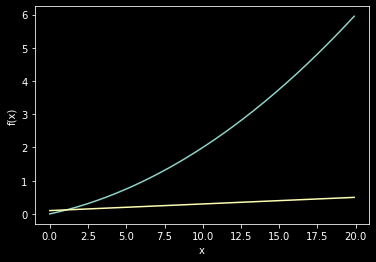

In [172]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/ (2*h)


f_temp = lambda x: .01*x**2+0.1*x


x = np.arange(0, 20.0, 0.1)

y = f_temp(x)
yy = np.array([numerical_diff(f_temp, i)for i in x])

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, yy)

plt.show()

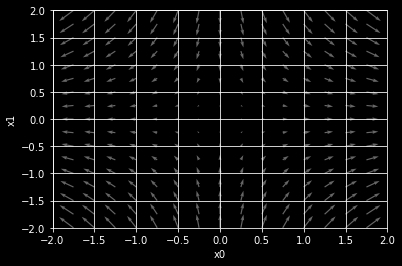

In [173]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        t = x[idx]
        x[idx] = t + h
        fxh1 = f(x)

        x[idx] = t - h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = t
    return grad

f_temp2 = lambda x: x[0]**2-x[1]**2

numerical_gradient(f_temp2, np.array([3.0, 4]))
x0 = np.arange(-2, 2.1, 0.25)
x1 = np.arange(-2, 2.1, 0.25)

X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad_T = [numerical_gradient(f_temp2, np.array([x, y])) for x, y in zip(X, Y)]
grad = np.array([grad_T[i][0] for i in range(len(X))]), np.array([grad_T[i][1] for i in range(len(X))])

plt.quiver(X, Y, grad[0], grad[1], angles='xy', color='#666666')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()

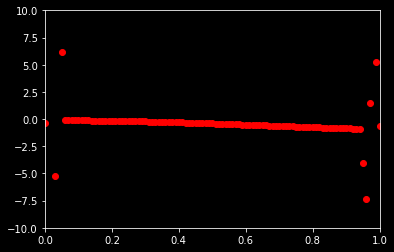

In [174]:
def center_diff2(x):
    return np.array([x[i+1] - x[i-1] for i in range(1, len(x)-1)])

def mibun(x, dx):
    T = center_diff2(x)/(2*dx)
    return np.concatenate(([(x[1]-x[0])/dx], T, [(x[-1]-x[-2])/dx]))


MIN = 0
MAX = 1
N = 101

fig, ax = plt.subplots()

domain = np.linspace(0, MAX, N)
dx = domain[1] - domain[0]

Y = domain**3 - 2*domain**2
YYY = mibun(mibun(Y, dx), dx)
AC = YYY

LN, = plt.plot(domain, Y, 'ro')

def init():
    global Y
    ax.set_xlim(0, 1)
    ax.set_ylim(-10, 10)
    return LN,

def update(frame):
    global Y, YYY, AC, LN
    YYY = mibun(mibun(Y, dx), dx)
    AC = 0.01*YYY
    Y += AC
    LN.set_data(domain, Y)
    return LN,

ani = matplotlib.animation.FuncAnimation(
    fig, update, frames=3, interval=100,
    init_func=init, blit=True
)

IPython.display.HTML(ani.to_html5_video())

